# Pratique de geopandas avec les donn√©es v√©lib

<p class="badges">

<a href="https://github.com/linogaliana/python-datascientist/blob/master/notebooks/course/manipulation/03_geopandas_TP.ipynb" class="github"><i class="fab fa-github"></i></a>
<a href="https://downgit.github.io/#/home?url=https://github.com/linogaliana/python-datascientist/blob/master/notebooks/course/manipulation/03_geopandas_TP.ipynb" target="_blank" rel="noopener"><img src="https://img.shields.io/badge/Download-Notebook-important?logo=Jupyter" alt="Download"></a>
<a href="https://nbviewer.jupyter.org/github/linogaliana/python-datascientist/blob/master/notebooks/course/manipulation/03_geopandas_TP.ipynb" target="_blank" rel="noopener"><img src="https://img.shields.io/badge/Visualize-nbviewer-blue?logo=Jupyter" alt="nbviewer"></a>
<a href="https://datalab.sspcloud.fr/launcher/ide/jupyter-python?autoLaunch=true&onyxia.friendlyName=%C2%ABpython-datascience%C2%BB&init.personalInit=%C2%ABhttps%3A%2F%2Fraw.githubusercontent.com%2Flinogaliana%2Fpython-datascientist%2Fmaster%2Fsspcloud%2Finit-jupyter.sh%C2%BB&init.personalInitArgs=%C2%ABmanipulation%2003_geopandas_TP%C2%BB&security.allowlist.enabled=false" target="_blank" rel="noopener"><img src="https://img.shields.io/badge/SSPcloud-Tester%20via%20SSP--cloud-informational&amp;color=yellow?logo=Python" alt="Onyxia"></a><br>
<a href="https://mybinder.org/v2/gh/linogaliana/python-datascientist/master?filepath={binder_path}" target="_blank" rel="noopener"><img src="https://img.shields.io/badge/Launch-Binder-E66581.svg?logo=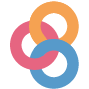" alt="Binder"></a>
<a href="http://colab.research.google.com/github/linogaliana/python-datascientist/blob/master/notebooks/course/manipulation/03_geopandas_TP.ipynb" target="_blank" rel="noopener"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>
<a href="https://github.dev/linogaliana/python-datascientist/notebooks/course/manipulation/03_geopandas_TP.ipynb" target="_blank" rel="noopener"><img src="https://img.shields.io/static/v1?logo=visualstudiocode&label=&message=Open%20in%20Visual%20Studio%20Code&labelColor=2c2c32&color=007acc&logoColor=007acc" alt="githubdev"></a>

</p>

</p>

Installations pr√©alables :

In [2]:
!pip install pandas fiona shapely pyproj rtree # √† faire obligatoirement en premier pour utiliser rtree ou pygeos pour les jointures spatiales
!pip install contextily
!pip install geopandas
!pip install pygeos

Les instructions d‚Äôinstallation du package `cartiflette`
sont quant √† elles d√©taill√©es dans le chapitre
pr√©c√©dent.

In [3]:
import geopandas as gpd

# Lire et enrichir des donn√©es spatiales

Dans cette partie,
nous utiliserons
le package [`cartiflette`](https://github.com/InseeFrLab/cartiflette.git)
qui facilite la r√©cup√©ration de contours de cartes.
Une version ant√©rieure de cet exercice, pr√©sent√©e sous forme
d‚Äô[exercice suppl√©mentaire üëáÔ∏è](#exo-supp), utilisait des fonds de carte issus
de `data.gouv`.

<div class="alert alert-success" role="alert">

1.  S‚Äôinspirer des exemples de code pr√©sents dans le chapitre pr√©c√©dent, mobilisant
    le package `cartiflette`
    pour t√©l√©charger les donn√©es communales des d√©partements 75, 92, 93 et 94.
    Vous pouvez nommer l‚Äôobjet `communes_borders`
2.  Regarder les premi√®res lignes des donn√©es. Identifier la diff√©rence avec
    un DataFrame standard.
3.  Afficher l‚Äôattribut `crs` de `communes_borders`. Ce dernier contr√¥le la
    transformation de l‚Äôespace tridimensionnel terrestre en une surface plane.
4.  Afficher les communes des Hauts de Seine (d√©partement 92) et utiliser la m√©thode
    `plot`
5.  R√©pr√©senter la carte de Paris : quel est le probl√®me ?

</div>

ID 
 NOM 
 NOM_M 
 INSEE_COM 
 STATUT 
 POPULATION 
 INSEE_CAN 
 INSEE_ARR 
 INSEE_DEP 
 INSEE_REG 
 SIREN_EPCI 
 geometry 
 
 
 
 
 0 
 COMMUNE_0000000009736048 
 Paris 
 PARIS 
 75056 
 Capitale d'√©tat 
 2165423 
 NR 
 1 
 75 
 11 
 200054781 
 POLYGON ((653313.800 6857558.100, 653249.300 6... 
 
 
 0 
 COMMUNE_0000000009736037 
 Levallois-Perret 
 LEVALLOIS-PERRET 
 92044 
 Commune simple 
 66082 
 16 
 2 
 92 
 11 
 200054781/200057982 
 POLYGON ((647761.400 6867306.900, 647839.200 6... 
 
 
 1 
 COMMUNE_0000000009736055 
 Bois-Colombes 
 BOIS-COLOMBES 
 92009 
 Commune simple 
 28841 
 11 
 2 
 92 
 11 
 200054781/200057990 
 POLYGON ((646224.700 6867615.800, 646229.000 6... 
 
 
 2 
 COMMUNE_0000000009736538 
 Malakoff 
 MALAKOFF 
 92046 
 Commune simple 
 30950 
 18 
 1 
 92 
 11 
 200054781/200057966 
 POLYGON ((646995.300 6857373.400, 647177.500 6... 
 
 
 3 
 COMMUNE_0000000009736038 
 Clichy 
 CLICHY 
 92024 
 Commune simple 
 63089 
 09 
 2 
 92 
 11 
 200054781/200057990 
 POLYGON ((648952.800 6866241.200, 648865.900 6...

<Derived Projected CRS: EPSG:2154>
Name: RGF93 v1 / Lambert-93
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: France - onshore and offshore, mainland and Corsica.
- bounds: (-9.86, 41.15, 10.38, 51.56)
Coordinate Operation:
- name: Lambert-93
- method: Lambert Conic Conformal (2SP)
Datum: Reseau Geodesique Francais 1993 v1
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

La carte du 92 est la suivante:

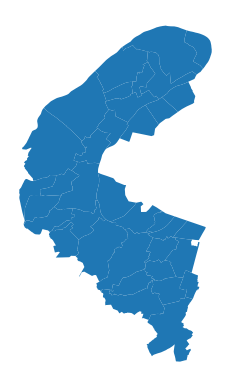

Quant √† Paris, √† l‚Äôissue de la question 5, la carte
aura l‚Äôaspect suivant:

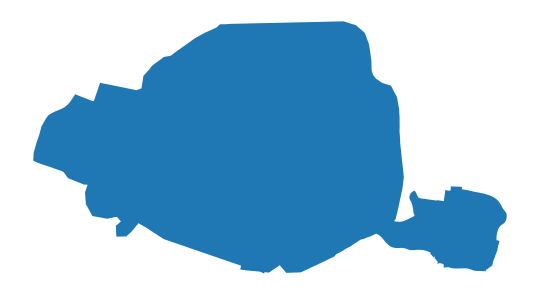

En effet, on ne dispose ainsi pas des limites des arrondissements parisiens, ce
qui appauvrit grandement la carte de Paris.
On pourrait les r√©cup√©rer directement
depuis le site d‚Äô*open-data* du Grand Paris, ce qui est propos√©
en [exercice suppl√©mentaire üëáÔ∏è](#exo-supp).
On propose ici d‚Äôutiliser √† nouveau
`cartiflette` pour cela afin de disposer du fonds de carte officiel.

<div class="alert alert-success" role="alert">

1.  Importer les donn√©es de d√©coupage des arrondissements parisiens √† l‚Äôadresse √† l‚Äôaide de `cartiflette`.
2.  V√©rifier sur une carte que les d√©coupages des arrondissements sont bien pr√©sents.
3.  V√©rifier l‚Äôattribut `crs`. Est-il coh√©rent avec celui des donn√©es communales ?
4.  Retirer Paris du jeu de donn√©es communales et utiliser les arrondissements
    pour enrichir (nommer l‚Äôobjet obtenu `data_borders`).
5.  Repr√©senter √† nouveau les communes de la petite couronne parisienne (75, 92, 93, 94)

</div>

La carte de Paris intra-muros est, apr√®s la
r√©cup√©ration des arrondissements avec
`cartiflette` de ce type l√†:

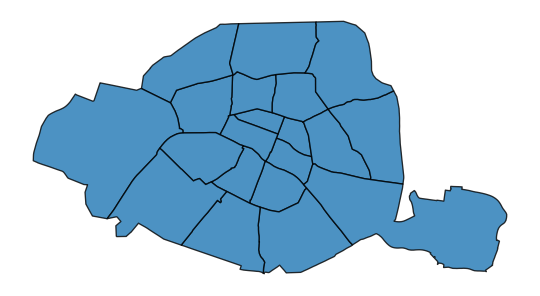

epsg:2154
epsg:2154
True

La carte obtenue √† l‚Äôissue de la question 6, c‚Äôest-√†-dire apr√®s
avoir consolid√© les donn√©es, devrait avoir l‚Äôaspect suivant:

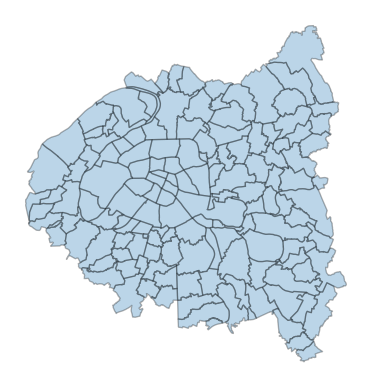

# Utiliser des donn√©es g√©ographiques comme des couches graphiques

Souvent, le d√©coupage communal ne sert qu‚Äôen fond de cartes, pour donner des
rep√®res. En compl√©ment de celui-ci, on peut d√©sirer exploiter
un autre jeu de donn√©es.

On va partir des donn√©es de localisation des
stations velib,
disponibles [sur le site d‚Äôopen data de la ville de Paris](https://opendata.paris.fr/explore/dataset/velib-emplacement-des-stations/table/) et
requ√™tables directement par l‚Äôurl
<https://opendata.paris.fr/explore/dataset/velib-emplacement-des-stations/download/?format=geojson&timezone=Europe/Berlin&lang=fr>

<div class="alert alert-success" role="alert">

1.  Importer les donn√©es velib sous le nom `station`
2.  V√©rifier la projection g√©ographique de `station` (attribut `crs`). Si celle-ci est diff√©rente des donn√©es communales, reprojeter ces
    derni√®res dans le m√™me syst√®me de projection que les stations de v√©lib
3.  Repr√©senter sur une carte les 50 stations les plus importantes (variable `capacity`). Vous pouvez √©galement afficher le fonds de carte des arrondissements de Paris.
    Cette [page](https://geopandas.org/mapping.html#maps-with-layers) peut vous aider pour comprendre comment afficher plusieurs couches √† la fois. Vous pouvez customiser la carte en retirant les axes gr√¢ce √† la m√©thode `set_axis_off` et mettre un titre tel que *‚ÄúLes 50 principales stations de V√©lib‚Äù* avec la m√©thode `set_title`.
4.  Afficher √©galement (trait bleu et √©pais) les r√©seaux de transport en communs, disponibles [ici](https://data.iledefrance-mobilites.fr/explore/dataset/traces-du-reseau-ferre-idf/map/?location=7,48.69717,2.33167&basemap=jawg.streets). L‚Äôurl √† requ√™ter est
    <https://data.iledefrance-mobilites.fr/explore/dataset/traces-du-reseau-ferre-idf/download/?format=geojson&timezone=Europe/Berlin&lang=fr>

</div>

capacity 
 name 
 stationcode 
 geometry 
 
 
 
 
 0 
 26 
 Cit√© Vaneau 
 7012 
 POINT (2.31961 48.85422) 
 
 
 1 
 27 
 Pergol√®se - Marbeau 
 16102 
 POINT (2.28151 48.87357) 
 
 
 2 
 22 
 Emile Reynaud - Porte de la Villette 
 19010 
 POINT (2.38870 48.90099) 
 
 
 3 
 33 
 Verdier - Jean Jaur√®s 
 21215 
 POINT (2.31236 48.81614) 
 
 
 4 
 49 
 Jean Bleuzen - Square du 11 Novembre 
 21706 
 POINT (2.29652 48.82326)

La carte attendu √† l‚Äôissue de la question 3 a l‚Äôaspect suivant:

Text(0.5, 1.0, 'Les 50 principales stations de V√©lib')

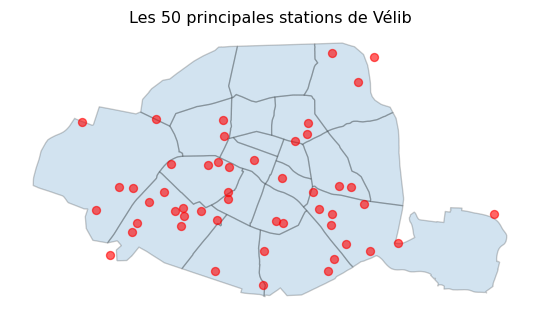

['TRAMWAY' 'RER' 'TRAIN' 'TER' 'METRO' 'NAVETTE' 'RER C']

L‚Äôajout du r√©seau de m√©tro permet d‚Äôobtenir une carte ressemblant √† celle-ci:

Text(0.5, 1.0, 'Les 50 principales stations de V√©lib')

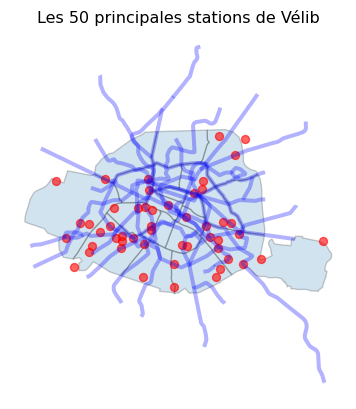

Pour faire une belle carte, il faudrait couper les lignes de m√©tro via une jointure spatiale ou
utiliser un fonds de carte conceptuel.
L‚Äôexercice suivant propose de mettre en oeuvre la deuxi√®me m√©thode. La premi√®re
est propos√©e en [exercice suppl√©mentaire üëáÔ∏è](#exo-supp).

<div class="alert alert-success" role="alert">

1.  Recr√©er par couche successive la carte pr√©c√©dente, que vous pouvez nommer `base`
2.  Utiliser `add_basemap` du package [`contextily`](https://contextily.readthedocs.io/en/latest/)
    pour ajouter, en arri√®re plan, un fonds de carte
3.  Jouer avec les fonds disponibles en utilisant l‚Äôargument `source`

</div>

Par exemple, en utilisant le fond `Stamen.Watercolor`, on obtient la carte
suivante. Celle-ci permet d√©j√† de mieux localiser les stations.

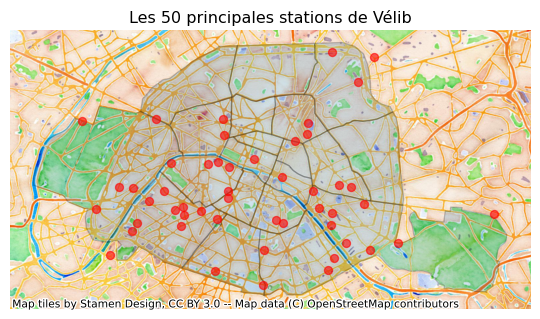

# Jointures spatiales

Les jointures attributaires fonctionnent comme avec un DataFrame `pandas`.
Pour conserver un objet spatial *in fine*, il faut faire attention √† utiliser en premier (base de gauche) l‚Äôobjet `GeoPandas`.
En revanche, l‚Äôun des int√©r√™ts des objets geopandas est qu‚Äôon peut √©galement faire une jointure sur la dimension spatiale gr√¢ce √† `sjoin`.

La documentation √† laquelle se r√©f√©rer est [ici](https://geopandas.org/mergingdata.html#spatial-joins).

<div class="alert alert-success" role="alert">

1.  Faire une jointure spatiale pour enrichir les donn√©es de stations en y ajoutant des informations de `data_paris`. Appeler cet objet `stations_info`
2.  Repr√©senter la carte des stations du 19e arrondissement (s‚Äôaider de la variable `c_ar`). Vous pouvez mettre en fond de carte les arrondissements parisiens.
3.  Compter le nombre de stations velib et le nombre de places velib par arrondissement ou commune (pour vous aider, vous pouvez compl√©ter vos connaissances avec [ce tutoriel](https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html)). Repr√©senter sur une carte chacune des informations
4.  Repr√©senter les m√™mes informations mais en densit√© (diviser par la surface de l‚Äôarrondissement ou commune en km2)
5.  (optionnel) Choisir une des cartes de densit√© et la nettoyer (retirer les axes, mettre les titres‚Ä¶)

</div>

capacity 
 name 
 stationcode 
 geometry 
 index_right 
 ID 
 NOM 
 NOM_M 
 INSEE_COM 
 STATUT 
 POPULATION 
 INSEE_CAN 
 INSEE_ARR 
 INSEE_DEP 
 INSEE_REG 
 SIREN_EPCI 
 INSEE_ARM 
 
 
 
 
 0 
 26 
 Cit√© Vaneau 
 7012 
 POINT (2.31961 48.85422) 
 17 
 ARR_MUNI0000000009736542 
 Paris 7e Arrondissement 
 PARIS 7E ARRONDISSEMENT 
 75056 
 NaN 
 48888 
 NaN 
 NaN 
 75 
 NaN 
 NaN 
 75107 
 
 
 68 
 29 
 Invalides - Duroc 
 7001 
 POINT (2.31619 48.84779) 
 17 
 ARR_MUNI0000000009736542 
 Paris 7e Arrondissement 
 PARIS 7E ARRONDISSEMENT 
 75056 
 NaN 
 48888 
 NaN 
 NaN 
 75 
 NaN 
 NaN 
 75107 
 
 
 83 
 52 
 Raspail - Bac 
 7005 
 POINT (2.32566 48.85563) 
 17 
 ARR_MUNI0000000009736542 
 Paris 7e Arrondissement 
 PARIS 7E ARRONDISSEMENT 
 75056 
 NaN 
 48888 
 NaN 
 NaN 
 75 
 NaN 
 NaN 
 75107 
 
 
 100 
 25 
 Place de Finlande 
 7026 
 POINT (2.31136 48.86241) 
 17 
 ARR_MUNI0000000009736542 
 Paris 7e Arrondissement 
 PARIS 7E ARRONDISSEMENT 
 75056 
 NaN 
 48888 
 NaN 
 NaN 
 75 
 NaN 
 NaN 
 75107 
 
 
 209 
 65 
 Mus√©e d'Orsay 
 7007 
 POINT (2.32586 48.85973) 
 17 
 ARR_MUNI0000000009736542 
 Paris 7e Arrondissement 
 PARIS 7E ARRONDISSEMENT 
 75056 
 NaN 
 48888 
 NaN 
 NaN 
 75 
 NaN 
 NaN 
 75107

Pour la question 2,
la premi√®re m√©thode consiste √† afficher
toute la ville mais √† ne repr√©senter que
les points des stations du 19e:

<AxesSubplot: >

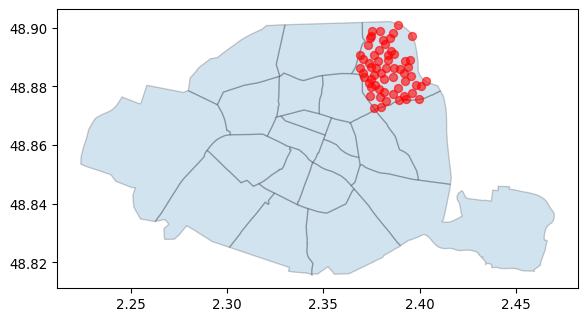

N√©anmoins, il est pr√©f√©rable de se centrer sur
le 19e en premier lieu, ce qui donne une
carte comme celle-ci:

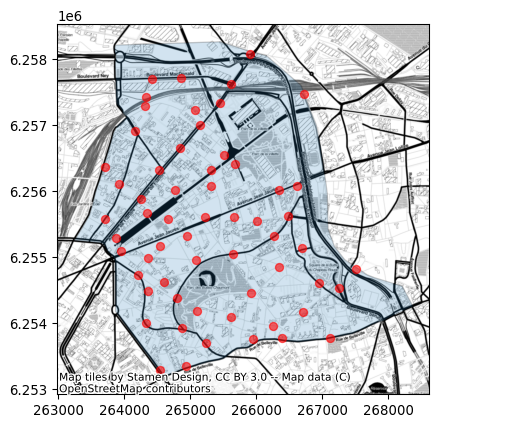

ID 
 NOM 
 NOM_M 
 INSEE_COM 
 STATUT 
 POPULATION 
 INSEE_CAN 
 INSEE_ARR 
 INSEE_DEP 
 INSEE_REG 
 SIREN_EPCI 
 geometry 
 INSEE_ARM 
 stationcode 
 capacity 
 
 
 
 
 0 
 COMMUNE_0000000009736037 
 Levallois-Perret 
 LEVALLOIS-PERRET 
 92044 
 Commune simple 
 66082 
 16 
 2 
 92 
 11 
 200054781/200057982 
 POLYGON ((2.28739 48.90364, 2.28846 48.90302, ... 
 NaN 
 11 
 359 
 
 
 1 
 COMMUNE_0000000009736055 
 Bois-Colombes 
 BOIS-COLOMBES 
 92009 
 Commune simple 
 28841 
 11 
 2 
 92 
 11 
 200054781/200057990 
 POLYGON ((2.26639 48.90629, 2.26645 48.90615, ... 
 NaN 
 2 
 30 
 
 
 2 
 COMMUNE_0000000009736538 
 Malakoff 
 MALAKOFF 
 92046 
 Commune simple 
 30950 
 18 
 1 
 92 
 11 
 200054781/200057966 
 POLYGON ((2.27818 48.81425, 2.28066 48.81469, ... 
 NaN 
 8 
 238 
 
 
 3 
 COMMUNE_0000000009736038 
 Clichy 
 CLICHY 
 92024 
 Commune simple 
 63089 
 09 
 2 
 92 
 11 
 200054781/200057990 
 POLYGON ((2.30377 48.89415, 2.30258 48.89487, ... 
 NaN 
 13 
 422 
 
 
 4 
 COMMUNE_0000000009736052 
 Nanterre 
 NANTERRE 
 92050 
 Pr√©fecture 
 96277 
 99 
 2 
 92 
 11 
 200054781/200057982 
 POLYGON ((2.22910 48.90603, 2.23037 48.90377, ... 
 NaN 
 8 
 222

La carte des places disponibles est celle-ci:

Text(0.5, 1.0, 'Nombre de places disponibles')

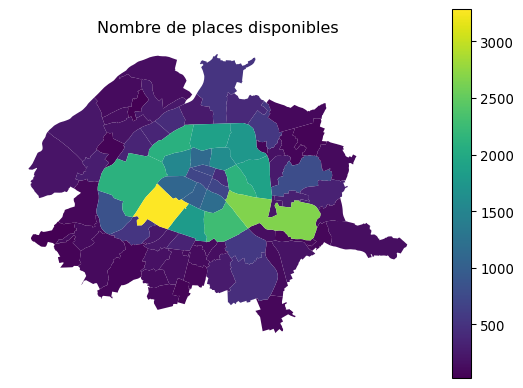

Alors que la carte des capacit√©s de stations est
plut√¥t celle-l√†:

Text(0.5, 1.0, 'Nombre de stations')

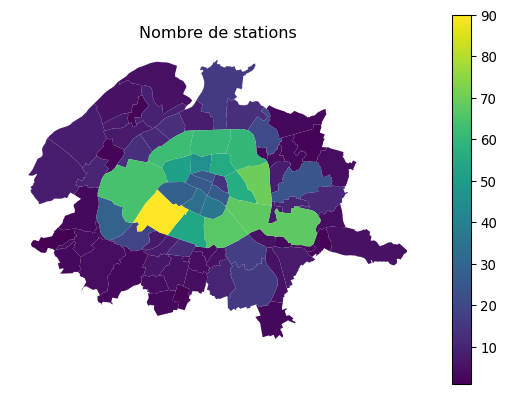

Pas vraiment de diff√©rence marqu√©e entre les
deux, on peut se contenter de regarder la capacit√©.

Enfin, dans la question 4,
si on repr√©sente plut√¥t la capacit√©
sous forme de densit√©, pour tenir compte
de la taille diff√©rente des arrondissements,
on obtient cette carte:

<AxesSubplot: >

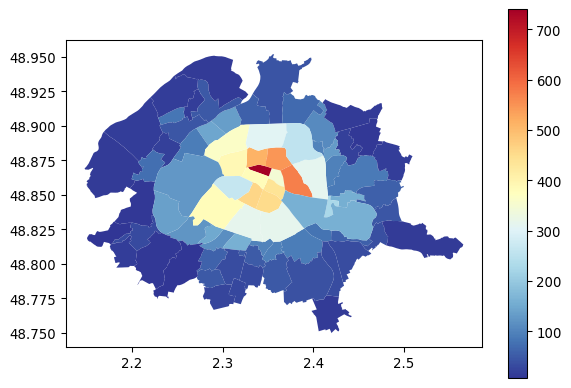

Avec une palette `plasma_r`, cela donne plut√¥t cette carte:

<AxesSubplot: >

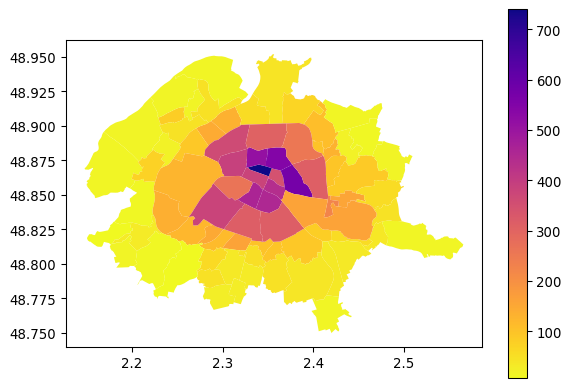

Avec un peu de travail sur l‚Äôesth√©tique, la carte
que vous obtenez √† l‚Äôissue de l‚Äôexercice
ressemble √† celle-ci:

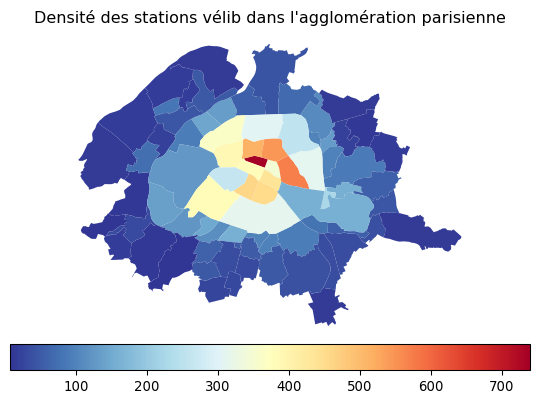

# Trouver les toilettes publiques les plus proches

## Objectif

Jusqu‚Äô√† pr√©sent, nous nous sommes familiaris√©s avec
la manipulation de donn√©es spatiales et la repr√©sentation
rapide de celle-ci gr√¢ce aux fonctionalit√©s de `GeoPandas`.

A partir de maintenant, nous allons utiliser `GeoPandas`
pour des t√¢ches de manipulation g√©om√©trique.  
Ces op√©rations reposeront sur des t√¢ches classiques
de la g√©omatique qui sont facilit√©es par le fait que
`GeoPandas` offre une surcouche au package `Shapely`
de la m√™me mani√®re que `Pandas` √©tait une sur-couche
de `Numpy` pour les op√©rations num√©riques.

L‚Äôexemple suivant permet d‚Äôillustrer
le principe d‚Äôune des
op√©rations que nous allons utiliser,
√† savoir la recherche de plus proche point:

In [32]:
from shapely.ops import Polygon
from shapely.ops import nearest_points
triangle = Polygon([(0, 0), (1, 0), (0.5, 1), (0, 0)])
square = Polygon([(0, 2), (1, 2), (1, 3), (0, 3), (0, 2)])
[o.wkt for o in nearest_points(triangle, square)]

['POINT (0.5 1)', 'POINT (0.5 2)']

`GeoPandas` va permettre de g√©n√©raliser ce processus
en utilisant non plus deux listes modifi√©es (les
polygones de `Shapely`) mais des `DataFrames` g√©ographiques.
Cela permettra, au passage, d‚Äôenrichir les
jointures spatiales avec les attributs des `DataFrames`
concern√©s.

Sur `Shapely`, vous pourrez trouver une aide [ici](https://pysal.org/scipy2019-intermediate-gds/deterministic/gds1-relations.html#how-about-nearest-neighbor-joins).
N√©anmoins, √† mesure que `GeoPandas` se d√©veloppe, il
devient de moins en moins n√©cessaire d‚Äôutiliser directement
`Shapely`.

## Mise en application

Nous allons rechercher les toilettes publiques les
plus proches de chaque station.
Sans les fonctionalit√©s de `GeoPandas`,
cette recherche serait assez p√©nible.

<div class="alert alert-success" role="alert">

1.  Charger la localisation des toilettes publiques pr√©sente ici : https://data.ratp.fr/explore/dataset/sanitaires-reseau-ratp/download/?format=geojson&timezone=Europe/Berlin&lang=fr. Appelez-la `toilettes_publiques`.
2.  Convertir les objets `toilettes_publiques` et `stations` en projection Lambert-93 (CRS 2154). Cette
    conversion permettra de mesurer en m√®tres les distances entre objets g√©ographiques. Sans
    celle-ci, nous ferions des distances entre coordonn√©es GPS, ce qui n‚Äôaide pas l‚Äôanalyse
    et l‚Äôinterpr√©tation.
3.  Utiliser la jointure spatiale par plus proche distance `sjoin_nearest` pour associer √† chaque station les toilettes publiques les plus proches
4.  Trouver les toilettes publiques les plus proches des stations de v√©lib autour d‚ÄôEdgard Quinet.
5.  Repr√©senter un histogramme des distances aux toilettes les plus proches

</div>

Le jeu de donn√©es *open-data* des toilettes
publiques pr√©sente l‚Äôaspect suivant:

accessible_au_public 
 acces_bouton_poussoir 
 tarif_gratuit_payant 
 gestionnaire 
 accessibilite_pmr 
 acces_passe_navigo_ou_ticket_t 
 ligne 
 localisation 
 en_zone_controlee 
 station 
 hors_zone_controlee_station 
 hors_zone_controlee_voie_publique 
 geometry 
 
 
 
 
 0 
 oui 
 oui 
 gratuit 
 Toilette publique RATP 
 oui 
 None 
 13 
 A proximit√© du point de vente - information. 
 None 
 Les Agnettes 
 oui 
 None 
 POINT (2.28606 48.92318) 
 
 
 1 
 oui 
 oui 
 gratuit 
 Toilette publique RATP 
 oui 
 None 
 14 
 Dans le couloir en direction des quais ligne 6... 
 oui 
 Bercy 
 None 
 None 
 POINT (2.37948 48.84019)

Les toilettes les plus proches
d‚ÄôEdgar Quinet sont les suivantes:

localisation 
 station 
 name 
 distance 
 
 
 
 
 299 
 Sur le quai ligne B, en direction de Saint-R√©m... 
 Denfert-Rochereau 
 Edgar Quinet - Raspail 
 737.660246 
 
 
 307 
 Sur le quai ligne B, en direction de Saint-R√©m... 
 Denfert-Rochereau 
 Edgar Quinet - Gait√© 
 1091.971078 
 
 
 401 
 Sur le quai ligne B, en direction de Saint-R√©m... 
 Denfert-Rochereau 
 Gare Montparnasse - Edgar Quinet 
 1177.501002

Il va donc falloir se
retenir un peu car s‚Äôagit de toilettes situ√©es
√† la station Denfert Rochereau !

Enfin, de mani√®re plus globale, voici la distribution
des distances aux toilettes les plus proches:

<AxesSubplot: ylabel='Frequency'>

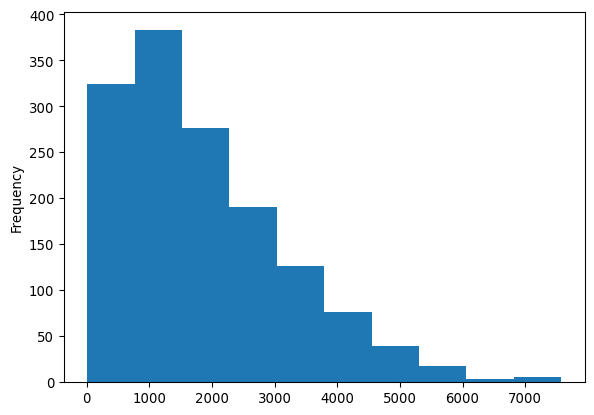

Le mode de la distribution est entre 1 et 2 km, ce
qui est une petite distance tout de m√™me !
C‚Äôest normal, il ne s‚Äôagit pas de l‚Äôensemble des
toilettes publiques de la ville de Paris mais
de celles g√©r√©es par la RATP. Rassurez-vous, au
moins dans Paris intra-muros, vous n‚Äôavez pas
√† syst√©matiquement marcher (ou rouler) autant.

# Exercices suppl√©mentaires

Voici une fonction pour t√©l√©charger et d√©zipper
facilement un fonds de carte issu de `data.gouv`

In [37]:
import requests
import tempfile
import zipfile

temporary_location = tempfile.gettempdir()

def download_unzip(url, dirname = tempfile.gettempdir(), destname = "borders"):
  myfile = requests.get(url)
  open("{}/{}.zip".format(dirname, destname), 'wb').write(myfile.content)
  with zipfile.ZipFile("{}/{}.zip".format(dirname, destname), 'r') as zip_ref:
      zip_ref.extractall(dirname + '/' + destname)

<div class="alert alert-success" role="alert">

Importer le fichier avec le package `GeoPandas`
(si vous avez laiss√© les param√®tres par d√©faut,
le fichier devrait
√™tre √† l‚Äôemplacement `temporary_location + "/borders/communes-20210101.shp"`).

</div>

<div class="alert alert-success" role="alert">

1.  Importer les donn√©es de d√©coupage des arrondissements parisiens √† l‚Äôadresse
    <https://opendata.paris.fr/explore/dataset/arrondissements/download/?format=geojson&timezone=Europe/Berlin&lang=fr>
2.  V√©rifier sur une carte que les d√©coupages des arrondissements sont bien pr√©sents.
3.  V√©rifier l‚Äôattribut `crs`. Est-il coh√©rent avec celui des donn√©es communales ?
4.  Retirer Paris du jeu de donn√©es communales et utiliser les arrondissements
    pour enrichir (nommer l‚Äôobjet obtenu `data_borders`). Ici, on peut ne pas se
    soucier de la variable commune de superficie aux niveaux diff√©rents car on
    va la recr√©er. En revanche, renommer la variable `c_arinsee` en `insee` avec
    la m√©thode `rename` et faire attention aux types des variables

</div>

<AxesSubplot: >

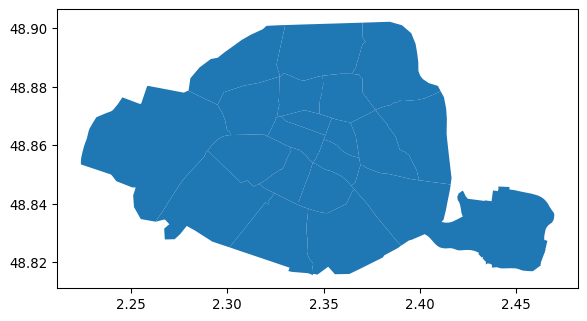

epsg:2154
False

/tmp/ipykernel_399/1514205710.py:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


ID 
 NOM 
 NOM_M 
 INSEE_COM 
 STATUT 
 POPULATION 
 INSEE_CAN 
 INSEE_ARR 
 INSEE_DEP 
 INSEE_REG 
 SIREN_EPCI 
 geometry 
 c_ar 
 l_aroff 
 surface 
 l_ar 
 n_sq_co 
 n_sq_ar 
 perimetre 
 
 
 
 
 18 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 75 
 NaN 
 NaN 
 POLYGON ((2.365 48.884, 2.365 48.884, 2.366 48... 
 10.0 
 Entrep√¥t 
 2.891739e+06 
 10√®me Ardt 
 750001537.0 
 750000010.0 
 6739.375055 
 
 
 19 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 75 
 NaN 
 NaN 
 POLYGON ((2.352 48.864, 2.351 48.863, 2.347 48... 
 2.0 
 Bourse 
 9.911537e+05 
 2√®me Ardt 
 750001537.0 
 750000002.0 
 4554.104360

## Jointures spatiales

L‚Äôobjectif de cet exercice est de ne conserver que les
lignes de transports √† l‚Äôint√©rieur de Paris intra-muros.
Il s‚Äôagit d‚Äôappliquer les jointures spatiales de mani√®re
un petit peu diff√©rente √† pr√©c√©demment.

<div class="alert alert-success" role="alert">

1.  Utiliser l‚ÄôURL <https://data.iledefrance-mobilites.fr/explore/dataset/traces-du-reseau-ferre-idf/download/?format=geojson&timezone=Europe/Berlin&lang=fr> pour r√©cup√©rer les lignes de transport
    de la RATP. L‚Äôappeler `transports`.
2.  A partir des arrondissements parisiens, utiliser `unary_union` pour cr√©er un unique polygone parisien. Utiliser `within` pour ne conserver que les points de `transports` qui se trouvent
    dans Paris intra-muros
3.  Repr√©senter graphiquement

</div>

La carte obtenue aura l‚Äôaspect suivant:

<AxesSubplot: >

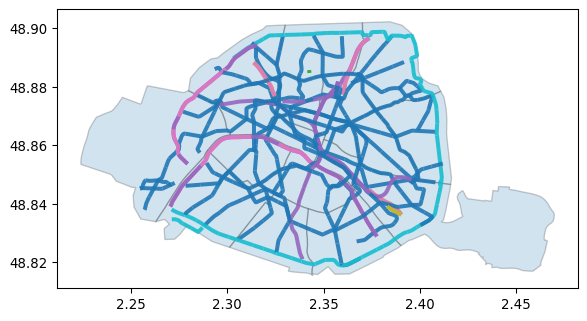

Cette fois, on a bien conserv√© que les lignes de transport dans
Paris. Un peu de travail sur le rendu serait n√©cessaire pour
obtenir une belle carte. Vous pouvez le faire en exercice, apr√®s
avoir consult√© le chapitre relatif √† la cartographie dans
la partie visualisation de donn√©es.